In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# DataInformation

In [2]:
data = pd.read_csv('AmesHousing.csv')

test_data = pd.read_csv('test.csv')

#Заменим пропуски в названиях признаков
data.columns = data.columns.str.replace(' ', '')

In [3]:
print(data.shape)
print(test_data.shape)

(2930, 82)
(1459, 80)


In [4]:
data.head(3)

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [5]:
data.dtypes.head()

Order            int64
PID              int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
dtype: object

In [6]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

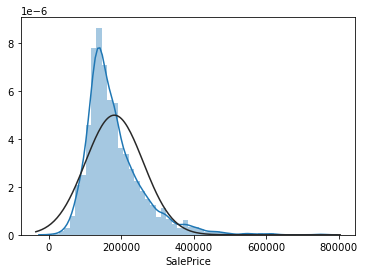

In [7]:
sns.distplot(data['SalePrice'], fit=norm);

In [8]:
print('Aссиметричность распределения остатков(Skewness):', abs(data['SalePrice']).skew())
print('Островершинность распределения(Kurtosis):', abs(data['SalePrice']).kurt())

Aссиметричность распределения остатков(Skewness): 1.7435000757376466
Островершинность распределения(Kurtosis): 5.118899951130896


> **Видно, что SalePrice не распределен нормально. При этом значение skewness далеко выходит за пределы [-0.5, 0.5], а значение kurtosis - за пределы [-2, 2]. Исправим это позже**

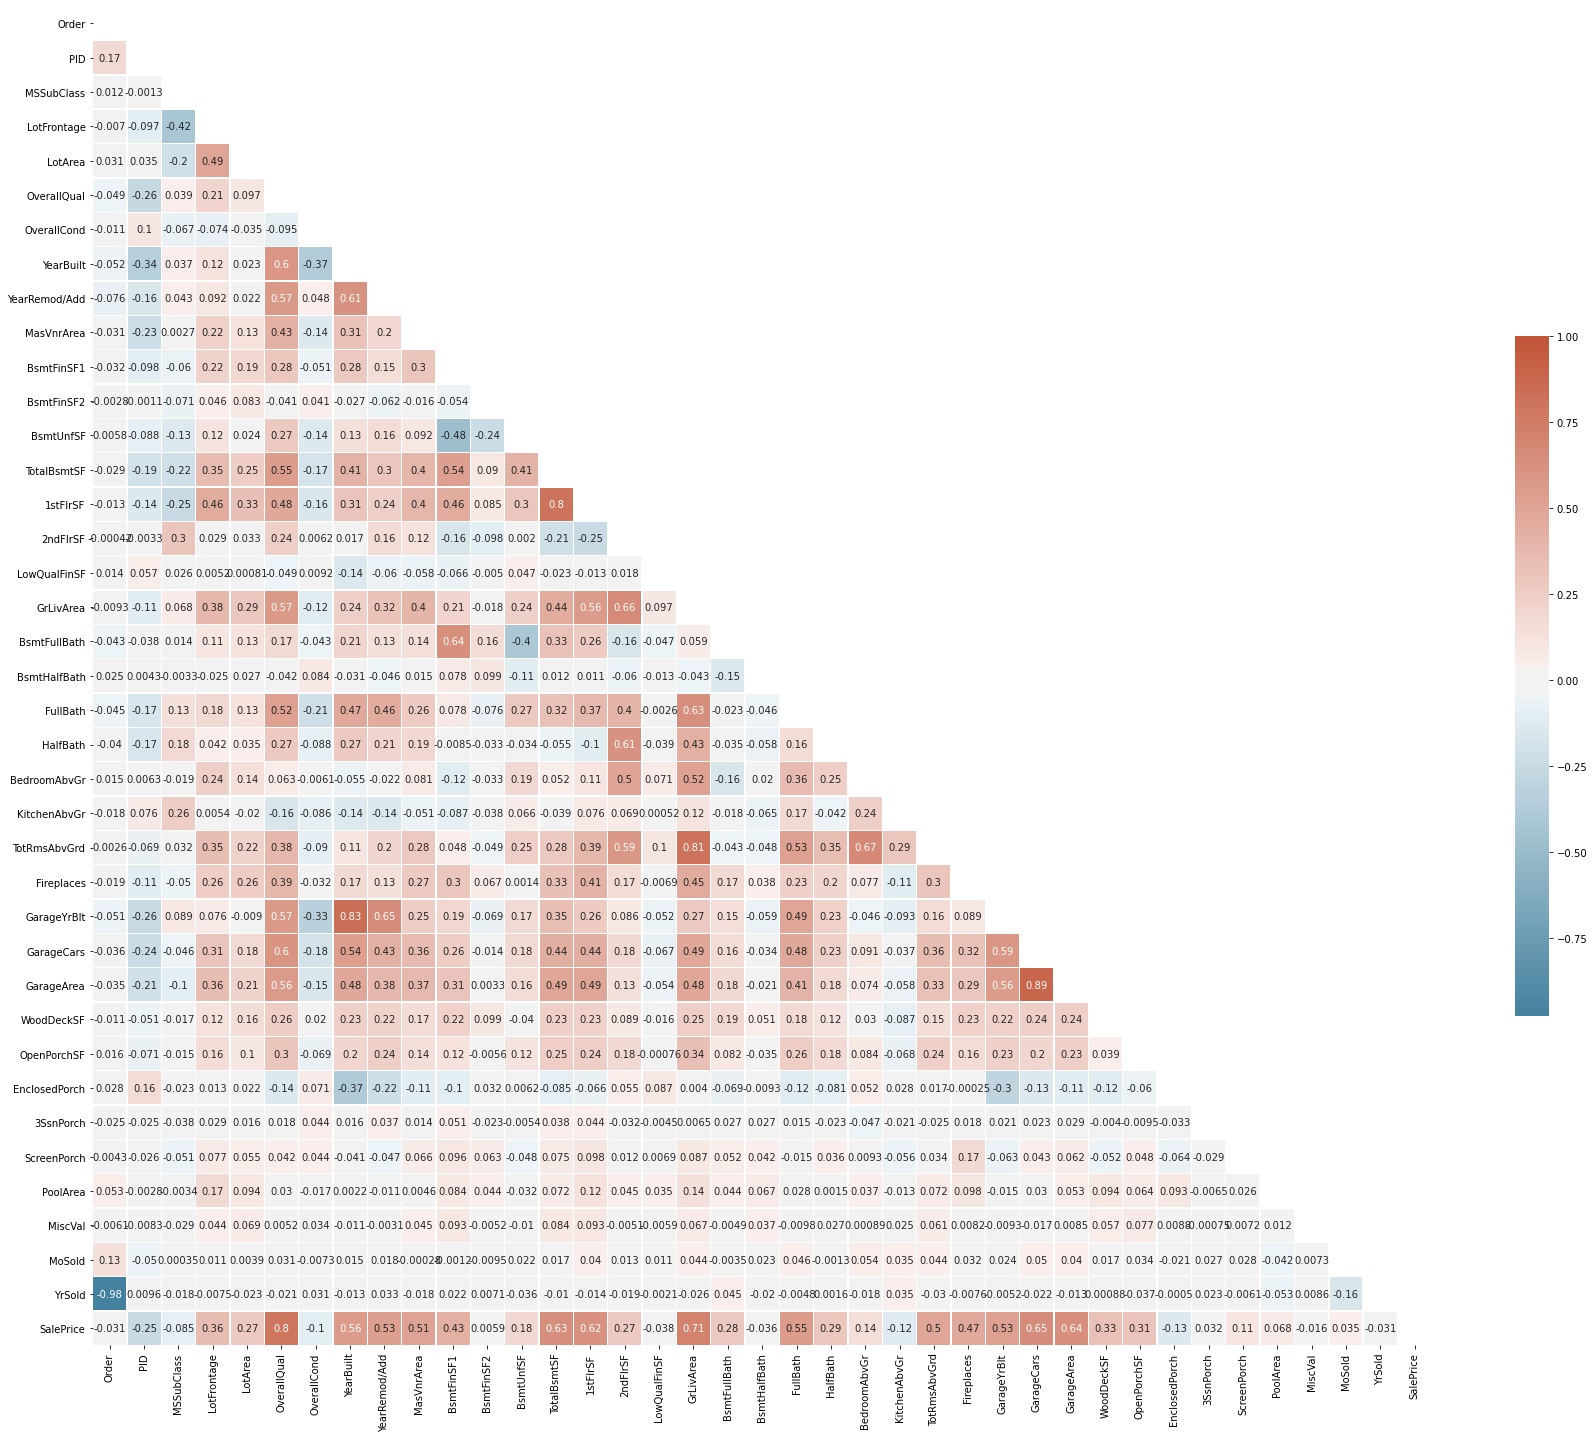

In [9]:
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [10]:
data.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


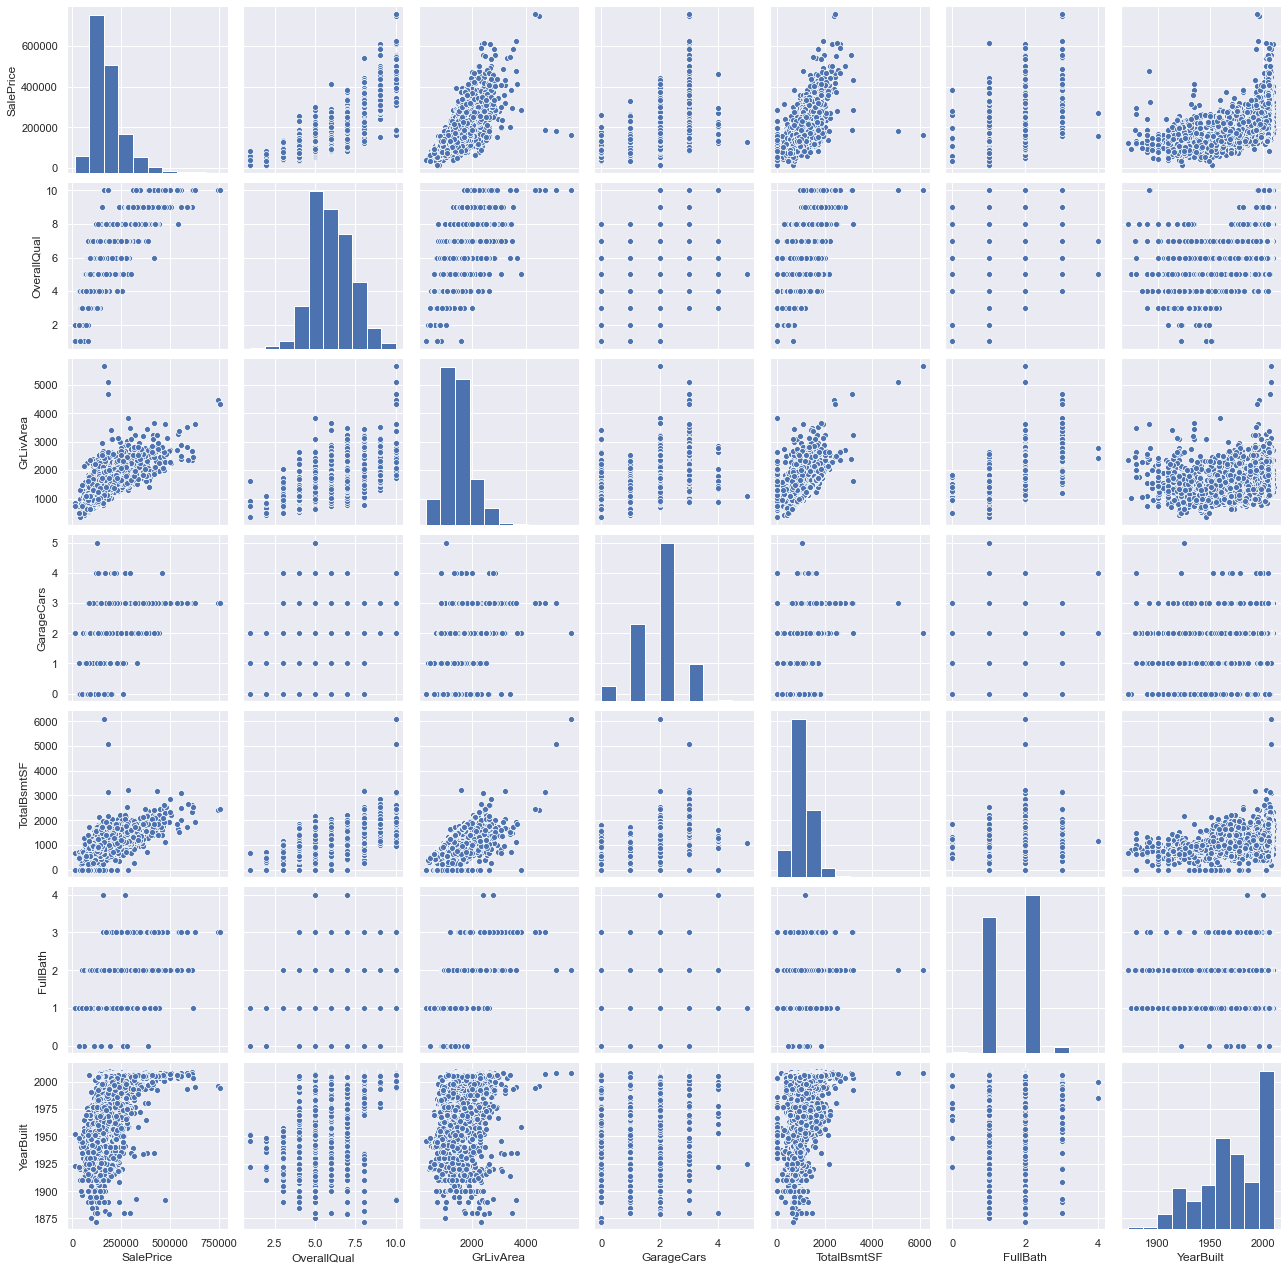

In [11]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


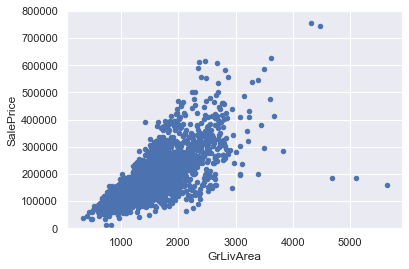

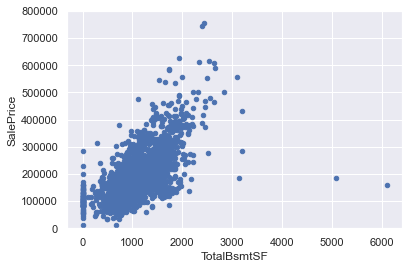

In [12]:
num_vars = ['GrLivArea','TotalBsmtSF']
for var in num_vars:
    temp_data = pd.concat([data['SalePrice'], data[var]], axis=1)
    temp_data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

> **2 точки справа на последнем графике заметно выбиваются из распределения остальных. Похоже на выбросы.**

> **Удалив их, rmse получился на 0.002 хуже.**

In [13]:
# # Удалим выбросы
# data.drop(data[(data['TotalBsmtSF']>4000)].index, inplace=True)
# # data.drop(data[(data['GrLivArea']>4500) & (data['SalePrice']<300000)].index, inplace=True)
# data.reset_index(drop=True, inplace=True)

# print(data.shape)

In [14]:
# num_vars = ['GrLivArea','TotalBsmtSF']
# for var in num_vars:
#     temp_data = pd.concat([data['SalePrice'], data[var]], axis=1)
#     temp_data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

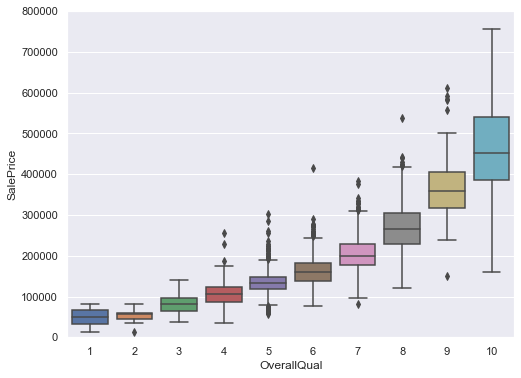

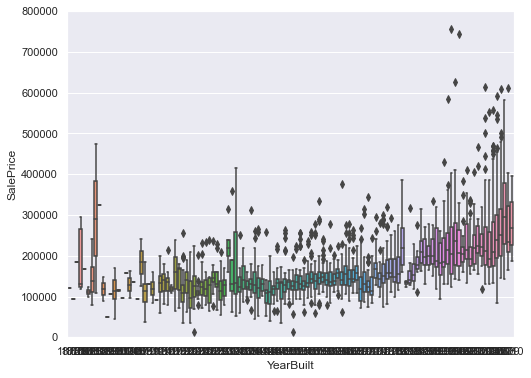

In [15]:
cat_vars = ['OverallQual','YearBuilt']
for var in cat_vars:
    temp_data = pd.concat([data['SalePrice'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=temp_data)
    fig.axis(ymin=0, ymax=800000);

# Preprocessing

In [16]:
target = data['SalePrice']
data_2 = data.drop(['SalePrice', 'Order','PID'], axis = 1)

test_id = test_data['Id']
test_data = test_data.drop(['Id'],axis = 1)

In [17]:
#Объединим тренировочные и тестовые данные, чтобы обработать их вместе. Перед обучением разделим их опять 

train_test = pd.concat([data_2, test_data], axis=0, sort=False)

### Missing Data

In [18]:
print('Кол-во строк с пропущенными значениями:', sum(train_test.isnull().any(axis=1)))

print('Кол-во признаков с пропущенными значениями:', sum(train_test.isnull().any(axis=0)))

Кол-во строк с пропущенными значениями: 4389
Кол-во признаков с пропущенными значениями: 36


**Посмотрим на кол-во и процент пропусков в каждом признаке**

In [19]:
total = train_test.isna().sum().sort_values(ascending=False)
percent = (train_test.isna().sum() / train_test.isna().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(37)

,Total,Percent
PoolQC,4373,0.996355
MiscFeature,4232,0.964229
Alley,4084,0.930508
Fence,3527,0.803600
YearRemodAdd,2930,0.667578
FireplaceQu,2152,0.490317
YearRemod/Add,1459,0.332422
LotFrontage,717,0.163363
GarageQual,237,0.053999
GarageCond,237,0.053999


**Из описания данных мы видим, что многие из этих пропущенных значений отражают отсутствие чего-либо. Мы потеряем много информации, просто удалив эти признаки или строки.**

**Поэтому обработаем пропуски более аккуратно.**

In [20]:
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

In [21]:
#Заполним пропуски наиболее часто встречающимся значением
for col in ['Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    train_test[col] = train_test[col].fillna(train_test[col].value_counts().index[0]) 
    
#Для признаков с большим процентом пропусков создадим отдельный класс 'None' для этих пропусков
for col in ['PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_test[col] = train_test[col].fillna('None')

train_test = train_test.drop('GarageYrBlt', axis = 1)
train_test = train_test.drop('YearRemodAdd', axis = 1)

for col in ['GarageArea', 'GarageCars']:
    train_test[col] = train_test[col].fillna(0)
    

# Признаки, в которых остались нулевые значения   
for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0    RL
0    RH
Name: MSZoning, dtype: object
0    141.0
0     80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    1960.0
0       NaN
Name: YearRemod/Add, dtype: float64
0    Stone
0     None
Name: MasVnrType, dtype: object
0    112.0
0      0.0
Name: MasVnrArea, dtype: float64
0    639.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    441.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    1080.0
0     882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64


In [22]:
# Заполним оставшиеся нулевые значения при помощи kNNRegressor

from sklearn.neighbors import KNeighborsRegressor

def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()        
    cols_no_nan = ttn.columns.difference(cols_nan).values     

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc], axis=1)

In [23]:
train_test = impute_knn(train_test)

# В оставшихся  пропущенных значениях заменим NaN на отдельный класс None
objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))


# Признаки с нулевыми значениями 
for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

# Feature Engineering

In [24]:
from scipy.stats import skew, norm
import statsmodels.api as sm

**Попробуем сгенерировать новые признаки. Однако, это только ухудшило результат (в третьем знаке rmse).**

In [25]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']
train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

# train_test['BsmtFinType1_Unf'] = 1*(train_test['BsmtFinType1'] == 'Unf')
train_test['HasWoodDeck'] = (train_test['WoodDeckSF'] == 0) * 1
train_test['HasOpenPorch'] = (train_test['OpenPorchSF'] == 0) * 1
train_test['HasEnclosedPorch'] = (train_test['EnclosedPorch'] == 0) * 1
train_test['Has3SsnPorch'] = (train_test['3SsnPorch'] == 0) * 1
train_test['HasScreenPorch'] = (train_test['ScreenPorch'] == 0) * 1
train_test = train_test.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
train_test['TotalSF'] = train_test['TotalBsmtSF'] + train_test['1stFlrSF'] + train_test['2ndFlrSF']
train_test['Total_porch_sf'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] +
                                train_test['EnclosedPorch'] + train_test['ScreenPorch'] +
                                train_test['WoodDeckSF'])

train_test['TotalBsmtSF'] = train_test['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
train_test['2ndFlrSF'] = train_test['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
train_test['GarageArea'] = train_test['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
train_test['GarageCars'] = train_test['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
train_test['LotFrontage'] = train_test['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
train_test['MasVnrArea'] = train_test['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
train_test['BsmtFinSF1'] = train_test['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
train_test['haspool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['has2ndfloor'] = train_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['hasgarage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['hasbsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['hasfireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# One-hot-encoding
train_test_dummy = pd.get_dummies(train_test)

# Получим индексы всех числовых признаков
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index

# Получим индексы всех признаков с ассимметричными распределениями остатков (|skewness| > 0.5)
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Логарифмируем все признаки с ассимметричными распределениями остатков
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

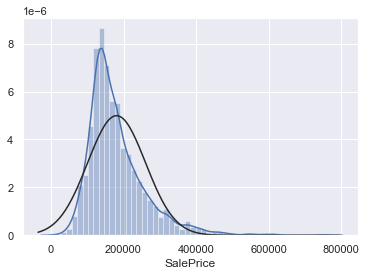

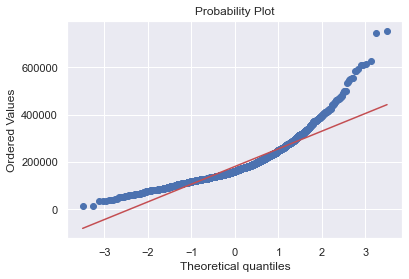

In [27]:
sns.distplot(target, fit=norm);
fig = plt.figure()
res = stats.probplot(target, plot=plt)

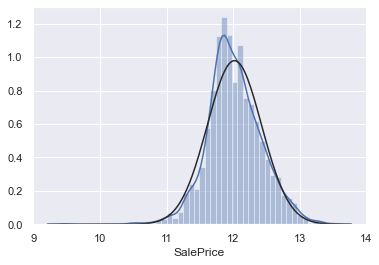

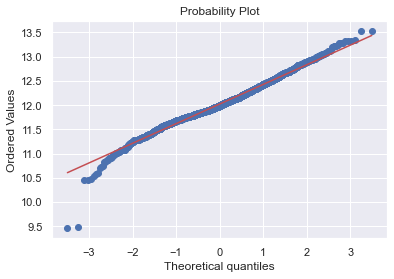

In [28]:
#Чтобы SalePrice был нормально распределен, логарифмируем метку
target_log = np.log1p(target)

sns.distplot(target_log, fit=norm);
fig = plt.figure()
res = stats.probplot(target_log, plot=plt)

In [29]:
print('Aссиметричность распределения остатков(Skewness) после логарифмирования:', target_log.skew())
print('Островершинность распределения(Kurtosis) после логарифмирования:', target_log.kurt())

Aссиметричность распределения остатков(Skewness) после логарифмирования: -0.014772659537224368
Островершинность распределения(Kurtosis) после логарифмирования: 1.5138180928006526


# 1. Catboost

In [30]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [31]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [32]:
train = train_test_dummy[0:2930]
test = train_test_dummy[2930:]
test['Id'] = test_id

In [33]:
X_train, X_val, y_train, y_val = train_test_split(train, target_log, test_size = 0.1, random_state=42)

cat = CatBoostRegressor()
fitted_cat = cat.fit(X_train, y_train, eval_set = (X_val,y_val), plot=True, verbose = 0)
cat_pred = cat.predict(X_val)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [34]:
cat_score = rmse(y_val, cat_pred)
print('rmse =', cat_score)

rmse = 0.09732491077692182


In [35]:
print('Стандартные параметры CatBoostRegressor:')

fitted_cat.get_all_params()

Стандартные параметры CatBoostRegressor:


{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.055344998836517334,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'max_leave

**Посмотрим на важность признаков для нашей модели. Это может помочь понять, какие признаки мы можем сгенерировать для улучшения качества модели.**

In [36]:
feat_imp = cat.get_feature_importance(prettified=True)
# feat_imp.head(30)

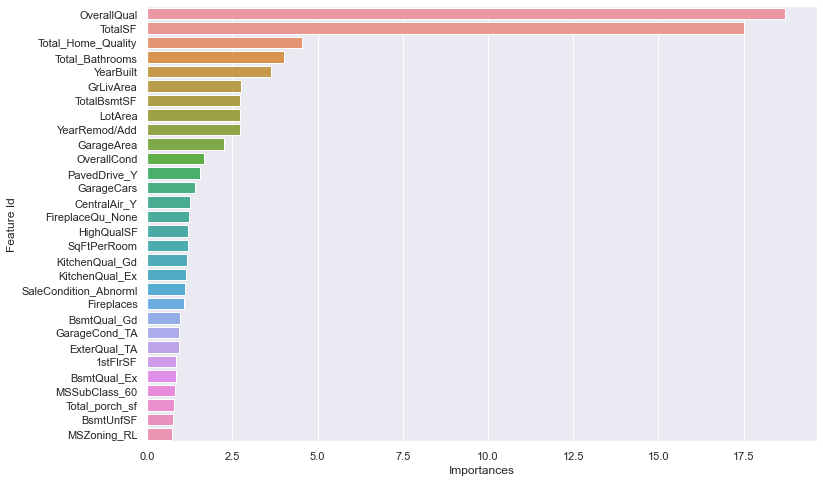

In [37]:
# Первые 30 самых важных признаков

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:30],feat_imp['Feature Id'][:30], orient = 'h')
plt.show()

### Hyperparameter Optimization

In [38]:
# Preforming a Random Grid Search to find the best combination of parameters

# grid = {'iterations': [1000, 3000, 6000],
#         'learning_rate': [0.05, 0.005, 0.0005],
#         'depth': [4, 6, 8, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# final_model = CatBoostRegressor()
# randomized_search_result = final_model.grid_search(grid, X = X_train, y = y_train, verbose = False, plot=True)

# print('best parameters:', randomized_search_result['params'])

> grid_search['params'] = { 'depth': 4, 'l2_leaf_reg': 1, 'iterations': 6000, 'learning_rate': 0.005 }

In [39]:
best_gridsearch_params = {'iterations': 6000,
                          'learning_rate': 0.005,
                          'depth': 4,
                          'l2_leaf_reg': 1,
                          'eval_metric':'RMSE',
                          'random_seed': 42}

         
cat_final = CatBoostRegressor(**best_gridsearch_params)
fitted_cat_final = cat_final.fit(X_train,y_train, eval_set = (X_val,y_val), plot=True, verbose = False)

cat_final_pred = fitted_cat_final.predict(X_val)
cat_final_score = rmse(y_val, cat_final_pred)

print('rmse =', cat_final_score)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

rmse = 0.09417053822558422


### Submission

In [40]:
test_pred = cat.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,115622.582291
1,1462,170492.099235
2,1463,185471.492592
3,1464,195270.000682
4,1465,187586.894630


In [41]:
submission.to_csv("catboost11.csv", index = False, header = True)